In [14]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('suffix_counts.csv',
                 names=['suff', 'n'],
                 dtype={'suff': str, 'n': int}
                )

In [3]:
df['len'] = df['suff'].str.len()

In [4]:
df['val'] = np.nan
ix = df['len'] < 10
df.loc[ix, 'val'] = df.loc[ix, 'suff'].apply(int)

In [142]:
df.head(10)

suff       n  len    val     normed
0    1  332638    1    1.0  12.714810
1    2  164567    1    2.0  12.011073
2  123  130174    3  123.0  11.776627
3    3  111662    1    3.0  11.623232
4   12   94094    2   12.0  11.452050
5    7   86845    1    7.0  11.371880
6   69   77224    2   69.0  11.254466
7   13   75830    2   13.0  11.236249
8   11   72214    2   11.0  11.187389
9   23   65885    2   23.0  11.095666

16.521815110513632

In [48]:
df['normed'] = np.log(df['n'])

In [95]:
df[df['n'] == smalls['n'].min()]

suff    n  len     val    normed
2132  2115  175    4  2115.0  5.164786
2133  0721  175    4   721.0  5.164786
2134   068  175    3    68.0  5.164786
2135  0424  175    4   424.0  5.164786
2136  0219  175    4   219.0  5.164786

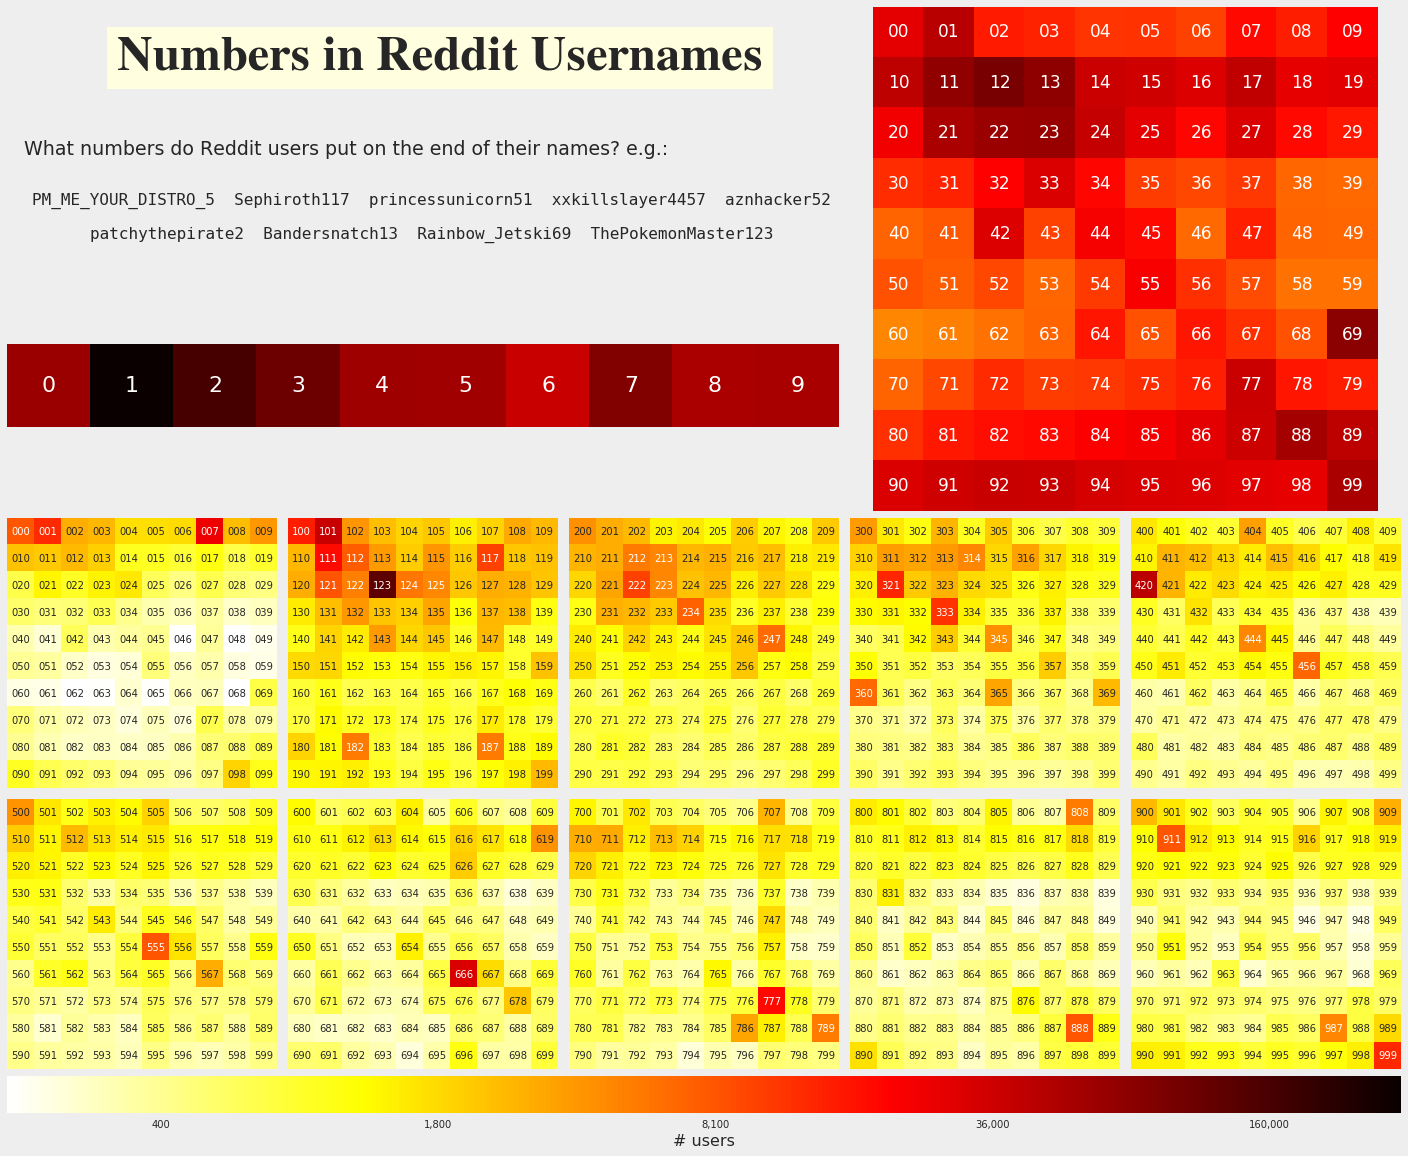

In [290]:
# Haha, what a mess this cell is
from __future__ import division
import seaborn as sns
import math
from textwrap import wrap
sns.set()

col = 'normed'

import matplotlib.colors as mplc
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

n_max = df[col].max()
smalls = df[df['len'] <= 3]
n_min = smalls[col].min()

cmap_name = 'hot_r'

_annot_kws = dict(fontsize=10, family='sans-serif')

def fmt_logn(logn, _posn):
    round_to_n = lambda x, n: int(round(x, -int(math.floor(math.log10(x))) + (n - 1)))
    return '{:,d}'.format(round_to_n(math.exp(logn), 2))

cbar_formatter = FuncFormatter(fmt_logn)

_default_heatmap_kwargs = dict(
    vmin=n_min,
    vmax=n_max,
    cmap=cmap_name,
    cbar=False,
    square=True,
    #annot=labels,
    fmt='s',
    annot_kws=_annot_kws,
    xticklabels=False,
    yticklabels=False,
    #ax=ax
)

def __heatmap(sub, ax, shape, **kwargs):
    dat = sub[col].values.reshape(shape)
    labels = sub['suff'].values.reshape(shape)
    
    default_kwargs = _default_heatmap_kwargs.copy()
    default_kwargs['annot'] = labels
    default_kwargs['ax'] = ax
    default_kwargs.update(kwargs)
    # XXX
    default_kwargs['square'] = False
    if shape[1] < 50:
        default_kwargs['annot_kws'] = _annot_kws.copy()
        default_kwargs['annot_kws']['fontsize'] = 12
    if 'cbar_ax' in kwargs:
        default_kwargs['cbar'] = True
        default_kwargs['cbar_kws'] = dict(orientation='horizontal',
                                          format=cbar_formatter,
                                          label='# users',
                                         )
    sns.heatmap(dat, **default_kwargs)

def _heatmap(n_digits, ax, shape=None, autoscale=False, **kwargs):
    n_to_shape = {1: (1, 10), 2: (10, 10), 3: (20, 50)}
    shape = shape or n_to_shape[n_digits]
    sub = df[df['len']==n_digits].sort_values(by='val')
    dat = sub[col].values.reshape(shape)
    labels = sub['suff'].values.reshape(shape)
    
    default_kwargs = _default_heatmap_kwargs.copy()
    default_kwargs['annot'] = labels
    default_kwargs['ax'] = ax
    default_kwargs.update(kwargs)
    if n_digits == 1:
        default_kwargs['annot_kws'] = _annot_kws.copy()
        default_kwargs['annot_kws']['fontsize'] = 22
    elif n_digits == 2:
        default_kwargs['annot_kws'] = _annot_kws.copy()
        default_kwargs['annot_kws']['fontsize'] = 17
    if autoscale:
        del default_kwargs['vmin']
        del default_kwargs['vmax']
    if 'cbar_ax' in kwargs:
        default_kwargs['cbar'] = True
        default_kwargs['cbar_kws'] = dict(orientation='horizontal',
                                          format=cbar_formatter,
                                          label='# users',
                                         )
    sns.heatmap(dat, **default_kwargs)

def heatmap(n_digits, autoscale=False):
    assert 1 <= n_digits <= 3
    n_to_fs = {
        1: (11, 4),
        2: (11, 10),
        3: (22, 9)
    }
    fs = n_to_fs[n_digits]
    fig, ax = plt.subplots(figsize=fs)
    _heatmap(n_digits, ax, autoscale=autoscale)
    
def heatmaps():
    W = 22
    H = 13
    ncols = 50
    col_width = W / ncols
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(W, H),
                                        gridspec_kw=dict(height_ratios=(1, 2, 20))
                                       )
    
    _heatmap(1, ax1, cbar=False)
    _heatmap(2, ax2, (2, 50), cbar=False)
    _heatmap(3, ax3, cbar=False)
    
def sharded_3d(axes=None):
    if axes is None:
        fig, axes = plt.subplots(2, 5, figsize=(22,9))
        axes = axes.flatten()
    shape = (10, 10)
    for i, ax in enumerate(axes):
        sub = df[
            (df['len']==3)
            & (df['suff'].str.startswith(str(i)))
        ].sort_values(by='val')
        dat = sub[col].values.reshape(shape)
        labels = sub['suff'].values.reshape(shape)
        sns.heatmap(dat, annot=labels, ax=ax, **_default_heatmap_kwargs)
    
def heatmaps_square(): # ZZZ removeme?
    fig = plt.figure(figsize=(22,13))
    cbar_height = .1
    wmargin = .02
    hmargin = .02
    gs = gridspec.GridSpec(4, 5, 
                           left=wmargin, bottom=hmargin, top=1-hmargin,
                           wspace=.02, hspace=.02,
                           height_ratios=[3, 3, 3, .5],
                          )
    ax1 = plt.subplot(gs[0,0:3])
    ax2 = plt.subplot(gs[0,3:])
    axes3 = []
    cbar_ax = plt.subplot(gs[3,:])
    for row in [1, 2]:
        for col in range(5):
            axes3.append(plt.subplot(gs[row,col]))
    _heatmap(1, ax1, cbar_ax=cbar_ax)
    _heatmap(2, ax2)
    sharded_3d(axes3)
    if 0:
        # Maybe better to specify explicitly with gridspec params for left, right, wspace, etc.
        fig.tight_layout()
        # Hack. Ax1 is kinda too big
        bb = ax1.get_position()
        bb.x0 = 0.125
        bb.x1 = 0.58
        ax1.set_position(bb)
    return fig

def heatmaps_square_title():
    bg = 'white'
    bg = '#e3efe7'
    bg = '#e7e7e7'
    bg = 'white'
    bg = '#eeeeee'
    fig = plt.figure(figsize=(22,16))
    fig.patch.set_facecolor(bg)
    cbar_height = .1
    wmargin = .02
    hmargin = .02
    gs = gridspec.GridSpec(5, 5, 
                           left=wmargin, bottom=hmargin, top=1-hmargin,
                           wspace=.04, hspace=.01,
                           height_ratios=[2.7, # title, 2-digit...
                                          2.7, # 1-digit, ...2-digit
                                          3, # 3-digit row 1
                                          3, # 3-digit row 2
                                          .4, # color bar
                                         ],
                          )
    ax1 = plt.subplot(gs[1,0:3])
    ax2 = plt.subplot(gs[0:2,3:])
    
    ax_title = plt.subplot(gs[0,0:3])
    title = 'Numerical Suffixes in Reddit Usernames'
    title = 'Numbers in Reddit Usernames'
    axt = ax_title
    axt.get_xaxis().set_visible(False)
    axt.get_yaxis().set_visible(False)
    axt.set_facecolor(bg)
    fontname = 'FreeSerif'
    bigfont = 49
    nudge = .02
    ax_title.text(.5+nudge, .75, title, 
                  fontsize=bigfont, ha='center', fontname=fontname,
                  fontweight='bold',
                  bbox=dict(facecolor='lightyellow', alpha=1, lw=0, pad=10.0),
                 )
    subtitle = 'What numbers do Reddit users put on the end of their names? e.g.:'
    subx = .02
    subha = 'left'
    ax_title.text(subx, .41, subtitle,
                  fontsize=19, ha=subha, #fontname=fontname,
                 )
    zzz = '''patchythepirate2
    acrimony87
    IMCONSTIPATED247
    wonderbread403
    Tacosauce3
    66Oracle99
    i_like_eggs93
    i_am_a_gtx1080
    darkdragon009
    Noobpwner1
    TrombonePlayer100'''
    examples = '''    
    aznhacker52
    princessunicorn51
    Bandersnatch13
    patchythepirate2
    Rainbow_Jetski69
    ThePokemonMaster123
    Sephiroth117
    PM_ME_YOUR_DISTRO_5
    xxkillslayer4457
    '''.split()
    import random
    random.seed(1337)
    random.shuffle(examples)
    maxlen = 85
    eg_text = '  '.join(examples)
    eg_text = '\n'.join(wrap(eg_text, maxlen))
    ax_title.text(subx+.01, .26, eg_text,
                  ha=subha, fontname='monospace',
                  fontsize=16,
                  transform=axt.transAxes,
                  va='top',
                  multialignment='center',
                  linespacing=2.5,
                 )
    # omg gtx1080 is my fave
    
    axes3 = []
    cbar_ax = plt.subplot(gs[4,:])
    for row in [2, 3]:
        for col in range(5):
            axes3.append(plt.subplot(gs[row,col]))
    _heatmap(1, ax1, cbar_ax=cbar_ax)
    _heatmap(2, ax2)
    sharded_3d(axes3)
    cb_text = cbar_ax.xaxis.label
    cb_text.set_fontsize(16)
    if 0:
        # Maybe better to specify explicitly with gridspec params for left, right, wspace, etc.
        fig.tight_layout()
        # Hack. Ax1 is kinda too big
        bb = ax1.get_position()
        bb.x0 = 0.125
        bb.x1 = 0.58
        ax1.set_position(bb)
        
    return fig
    
#heatmap(3);
#heatmaps()
fig = heatmaps_square_title();

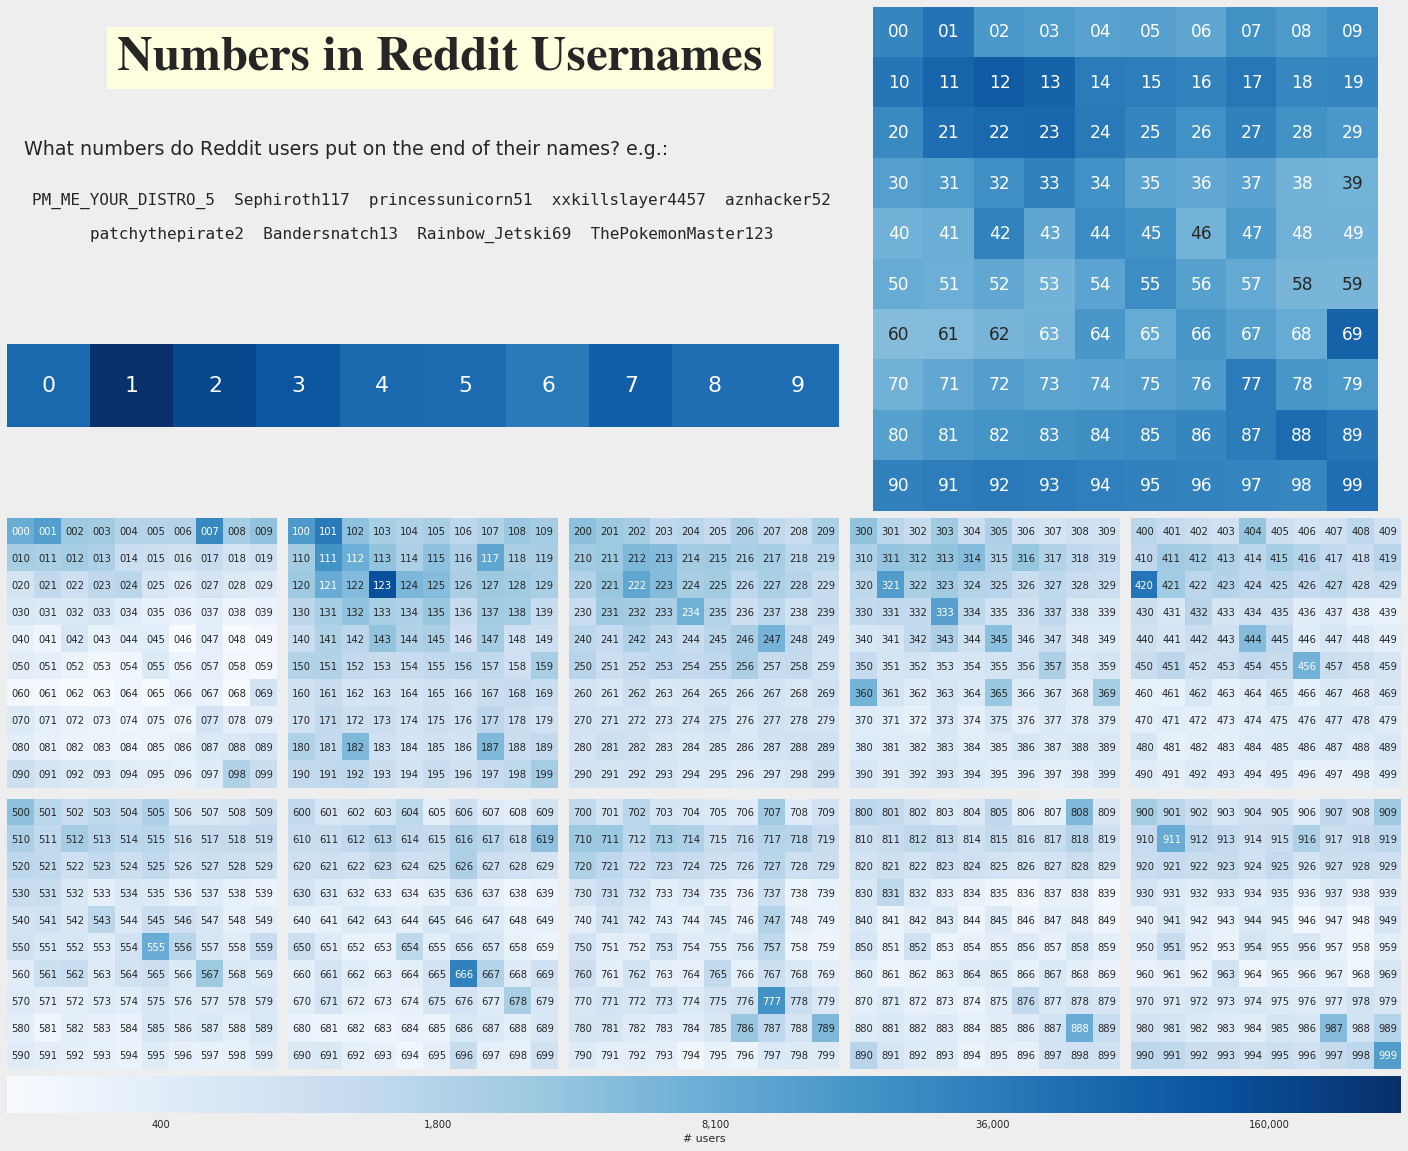

In [282]:
_default_heatmap_kwargs['cmap'] = 'Blues'
heatmaps_square_title();

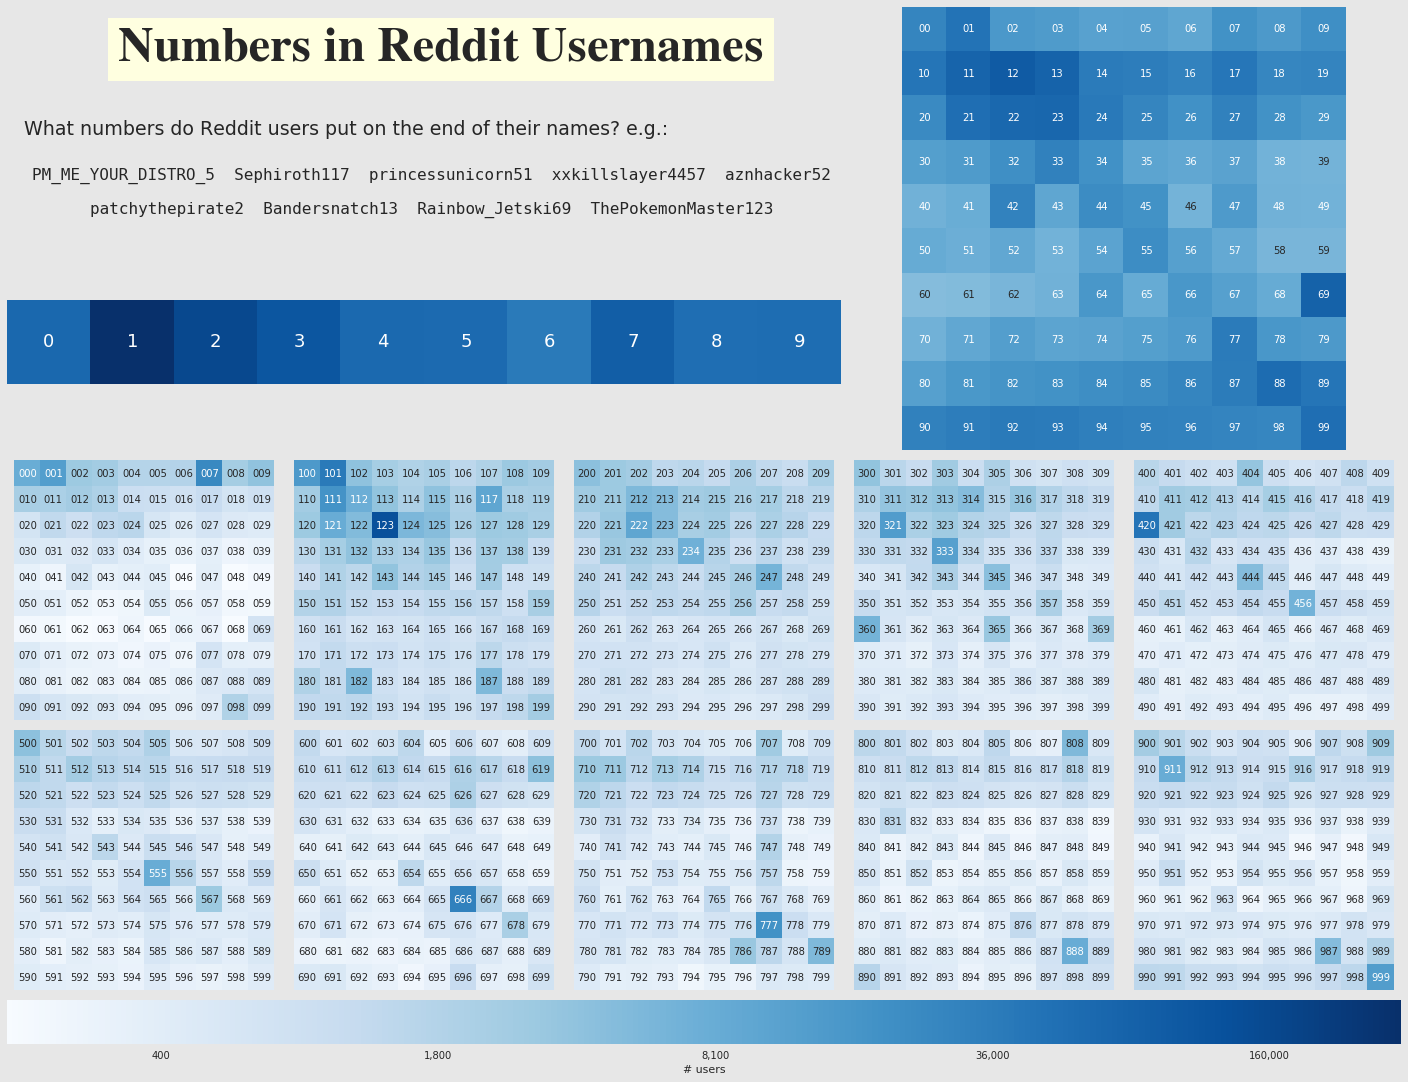

In [269]:
_default_heatmap_kwargs['cmap'] = 'Blues'
heatmaps_square_title();

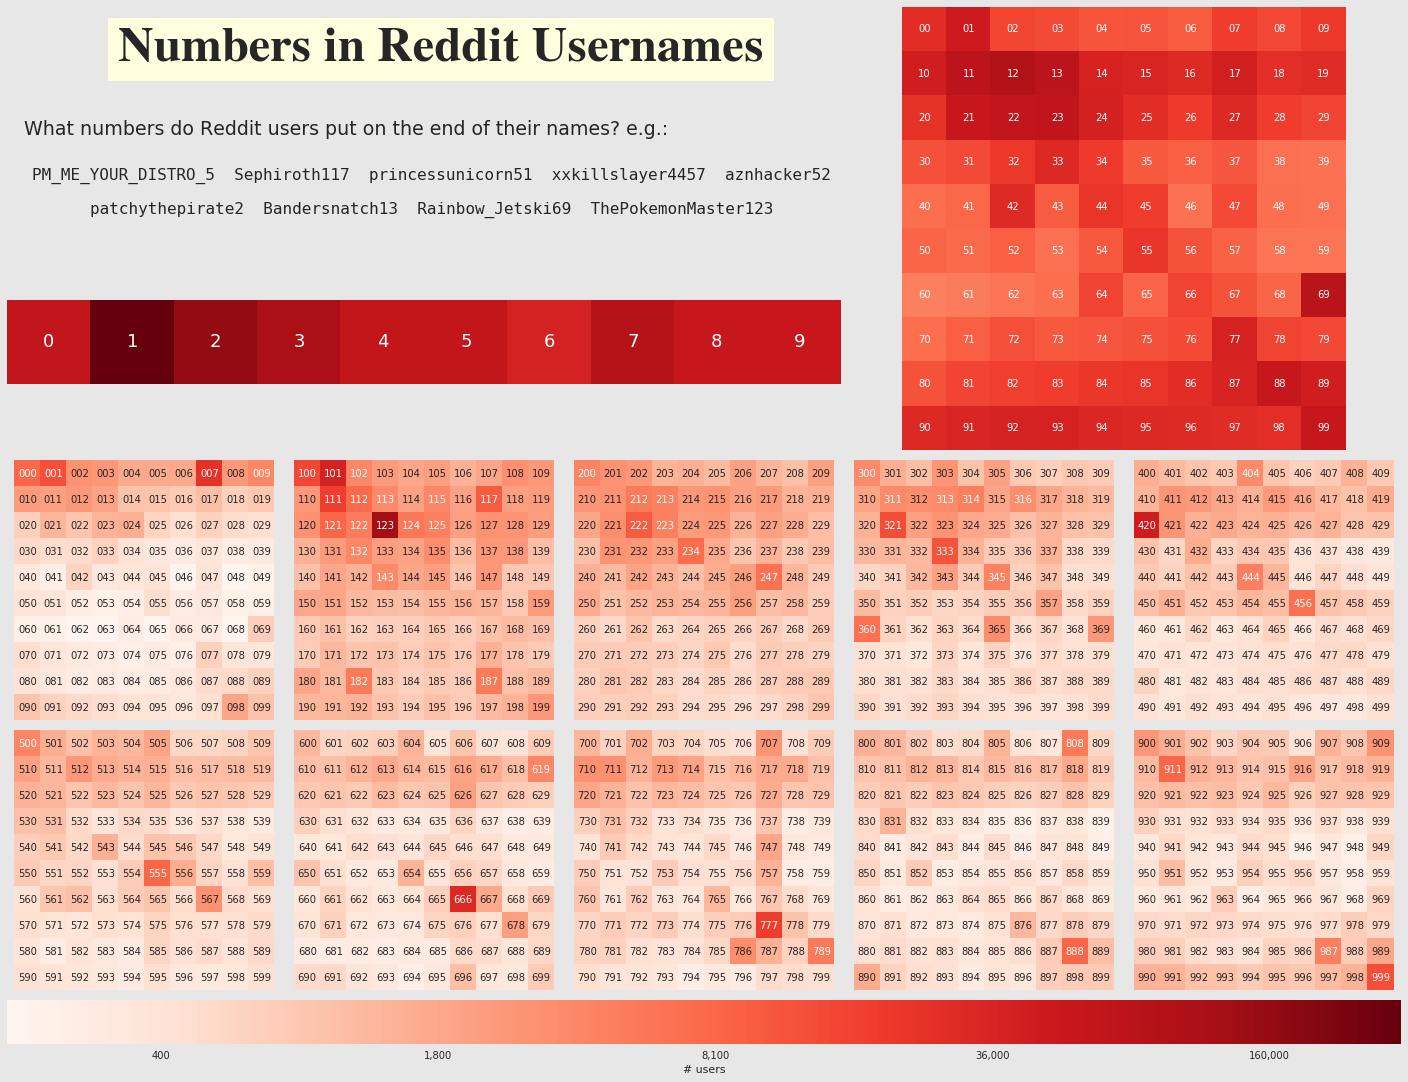

In [270]:
_default_heatmap_kwargs['cmap'] = 'Reds'
heatmaps_square_title();

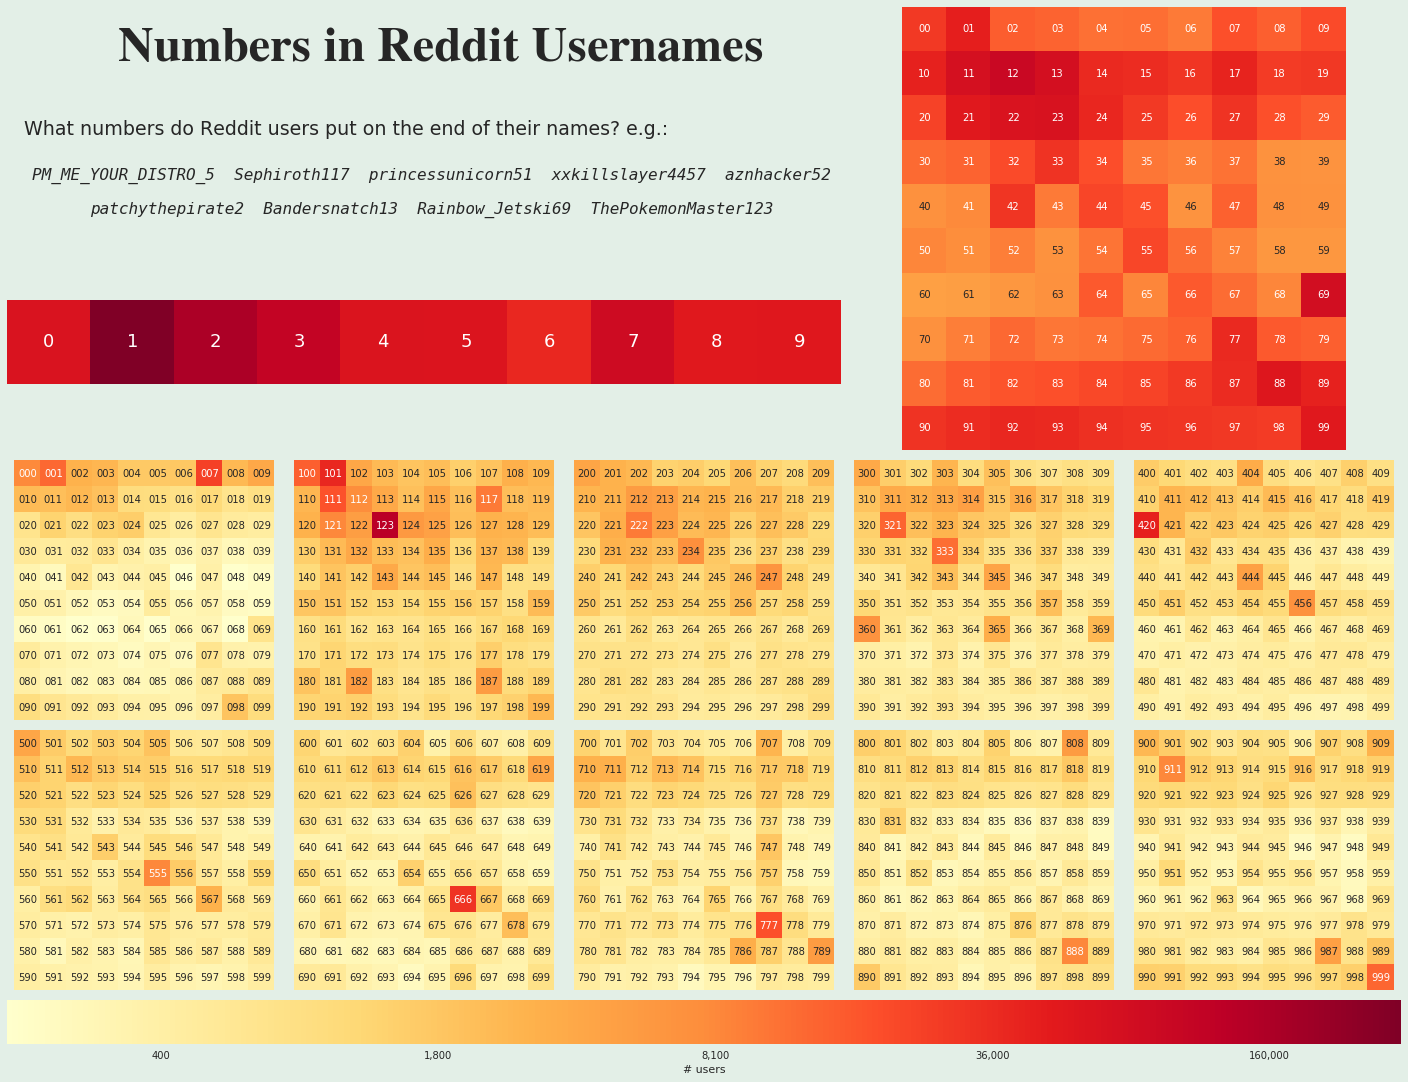

In [248]:
_default_heatmap_kwargs['cmap'] = 'YlOrRd'
heatmaps_square_title();

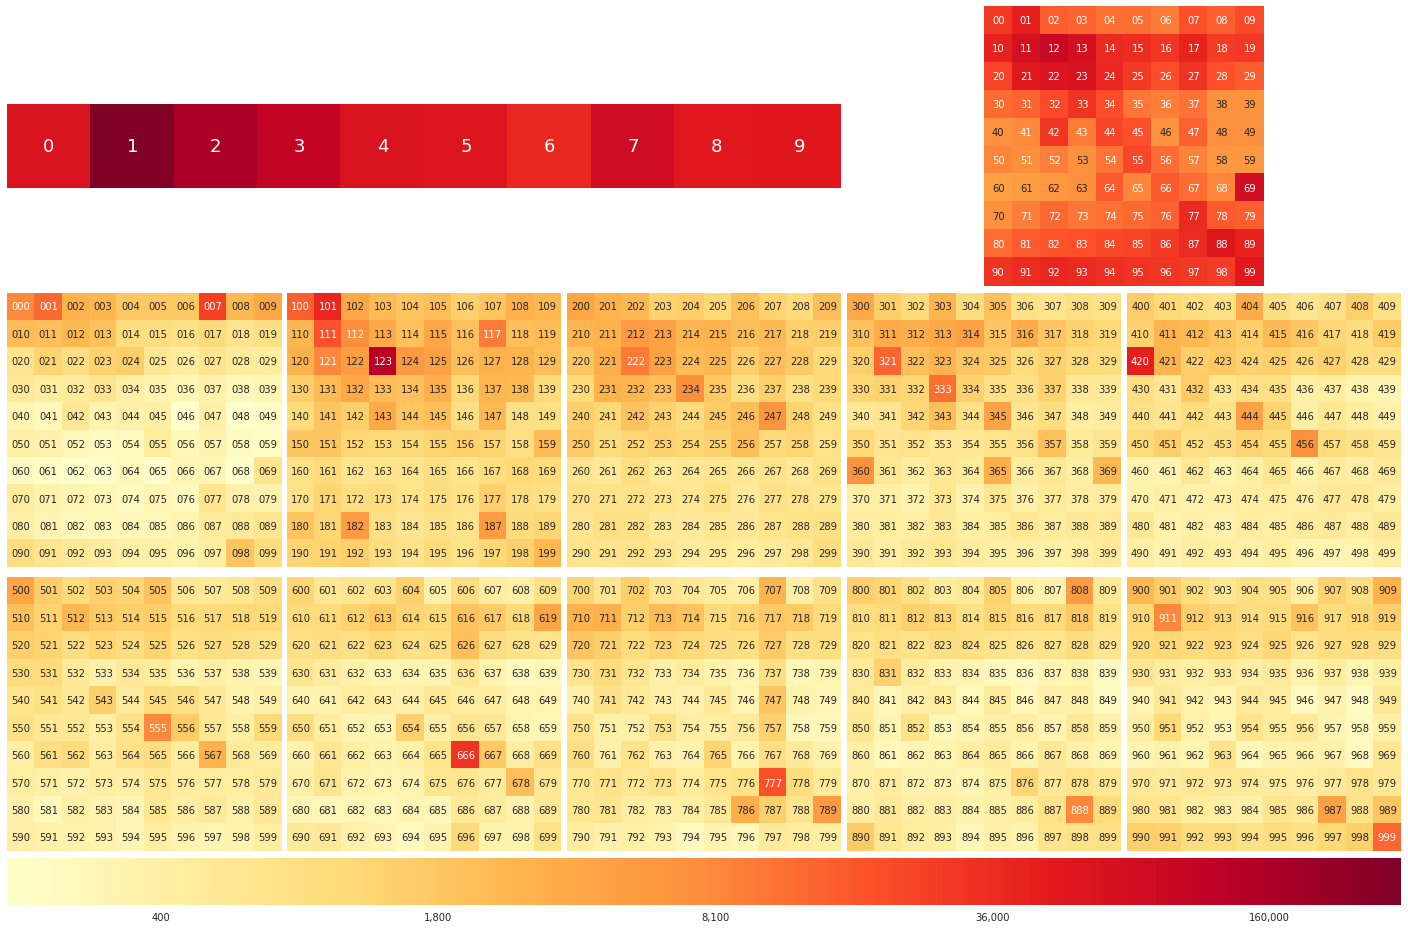

In [190]:
_default_heatmap_kwargs['cmap'] = 'YlOrRd'
heatmaps_square();

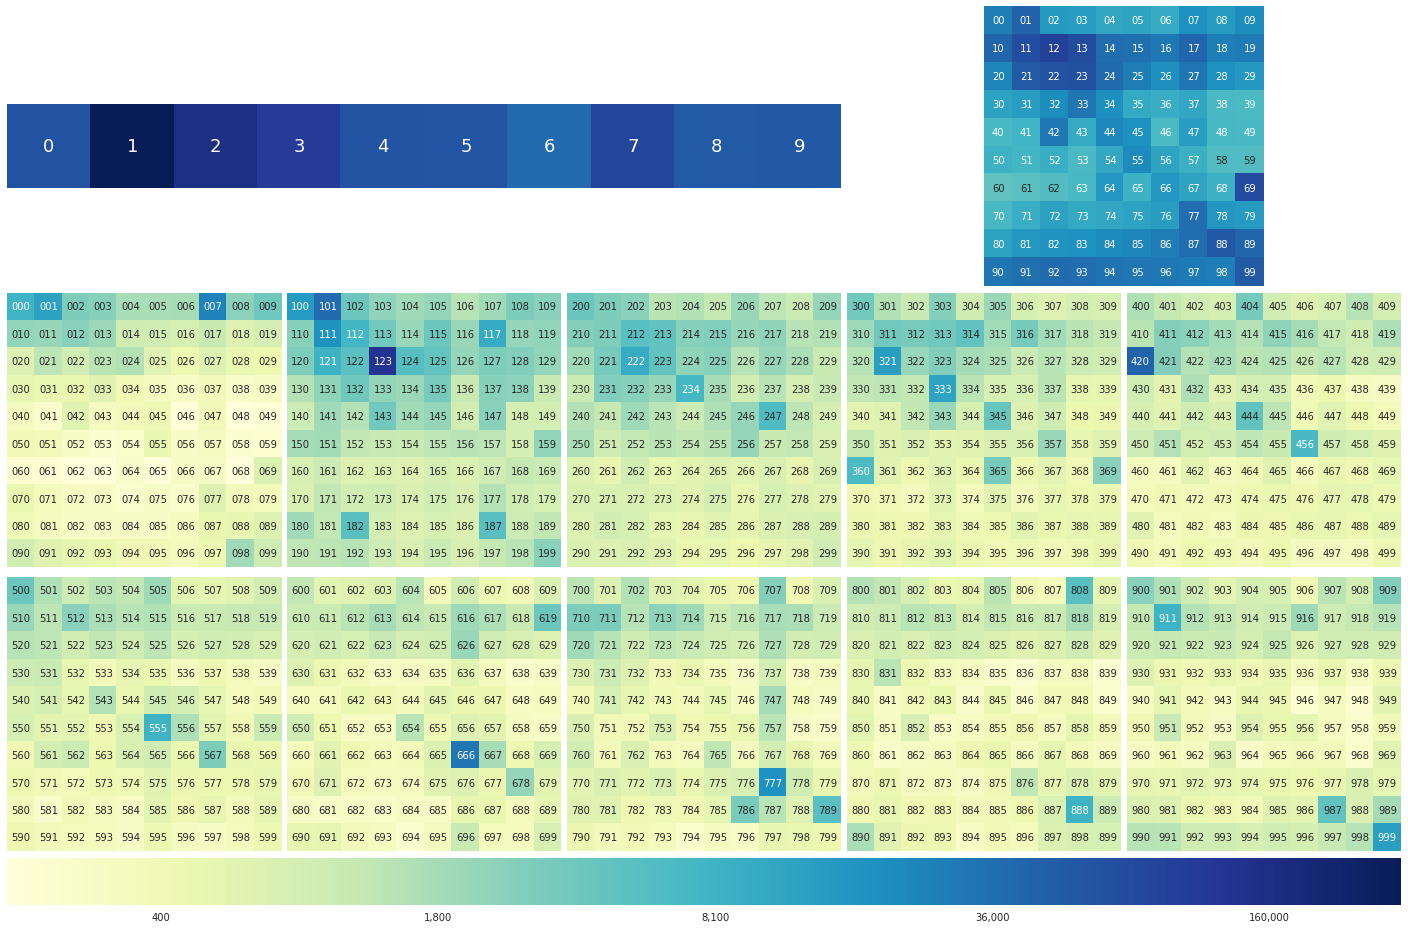

In [191]:
_default_heatmap_kwargs['cmap'] = 'YlGnBu'
heatmaps_square();

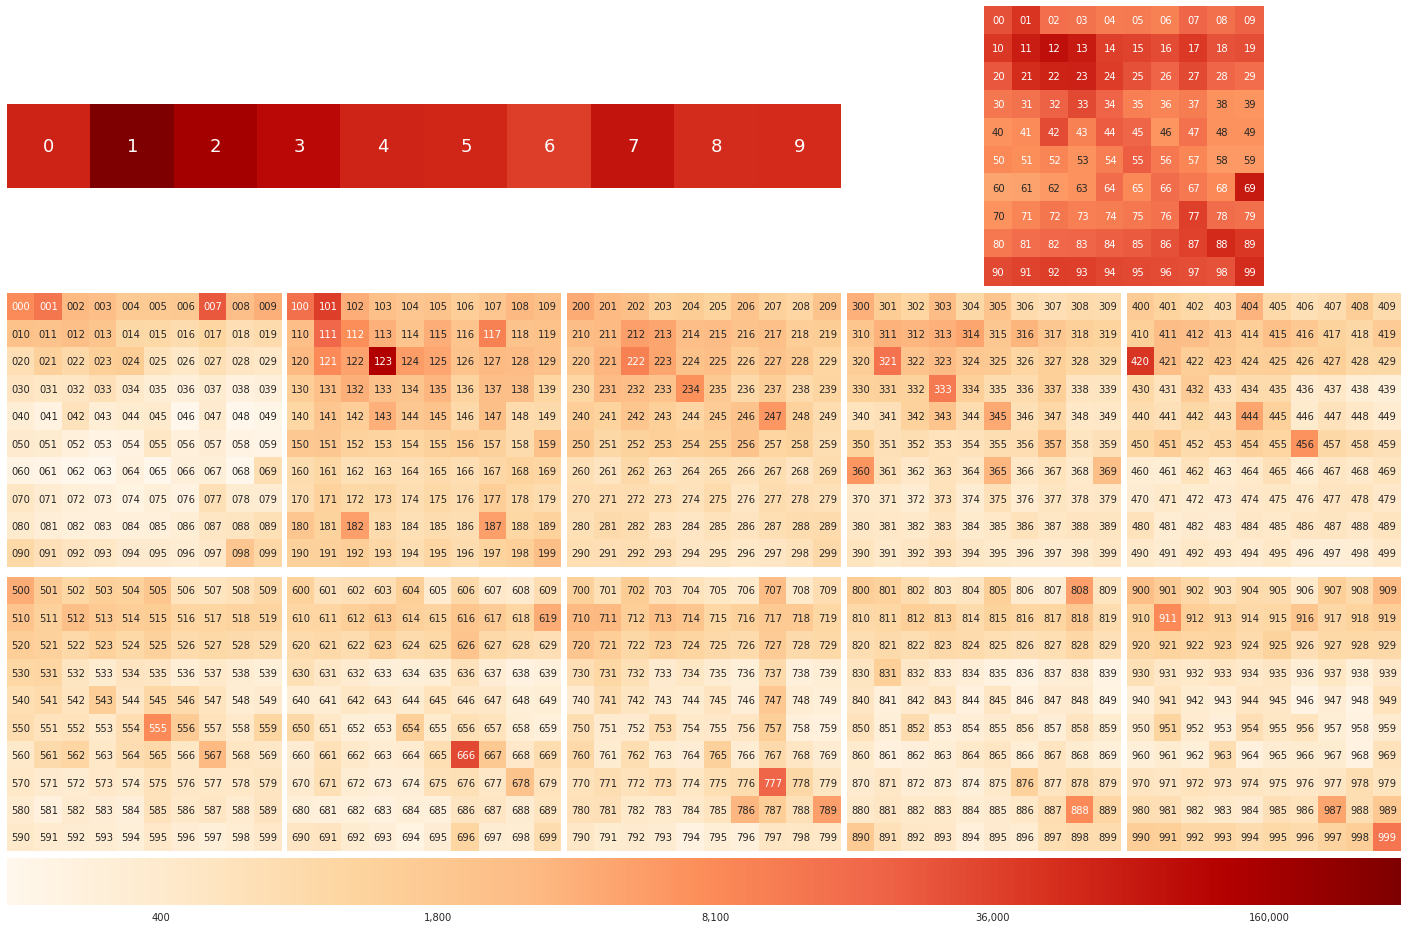

In [192]:
_default_heatmap_kwargs['cmap'] = 'OrRd'
heatmaps_square();

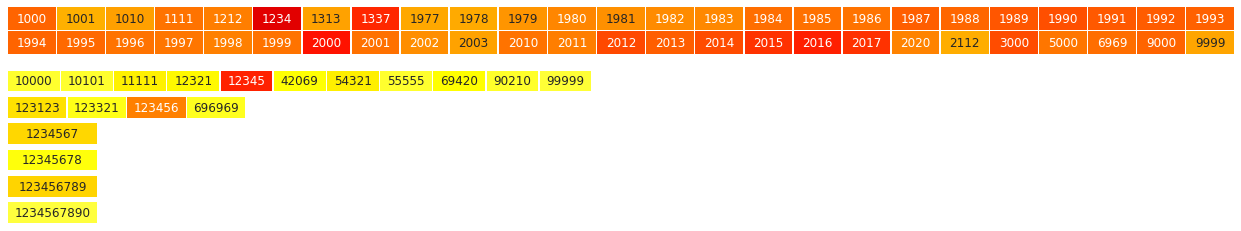

In [178]:
big = df[df['len'] > 3]
#big.sort_values(by='n', ascending=False).head(20)

realbig = df[df['len'] > 4]
#realbig.sort_values(by='n', ascending=False).head(20)

def remnants():
    #fig, axes = plt.subplots(7, 1, figsize=(22, 4))
    fig = plt.figure(figsize=(22,4))
    gs = gridspec.GridSpec(9, 25,
                           height_ratios=[1,1,.3,1,1,1,1,1,1]
                          )
    cols = 25
    thresh = 750
    rows = 1
    n = rows * cols
    sub4 = df[
            (df['len']==4) & (df['n'] >= thresh)
        ].sort_values(by='n', ascending=False).head(n*2).sort_values(by='val')
    shape = 2, 25
    ax = plt.subplot(gs[0:2,:])
    __heatmap(sub4, ax, shape, linewidths=.5, linecolor='white')
    
    for i, size in enumerate(range(5, 11)):
        #ax = axes.flatten()[i]
        i += 3
        sub = df[
            (df['len']==size) & (df['n'] >= thresh)
        ].sort_values(by='n', ascending=False).head(n).sort_values(by='val')
        shape = (1, len(sub))
        colz = min(25, len(sub) + 1)
        ax = plt.subplot(gs[i,:colz])
        __heatmap(sub, ax, shape, linewidths=.5, linecolor='white')

remnants()

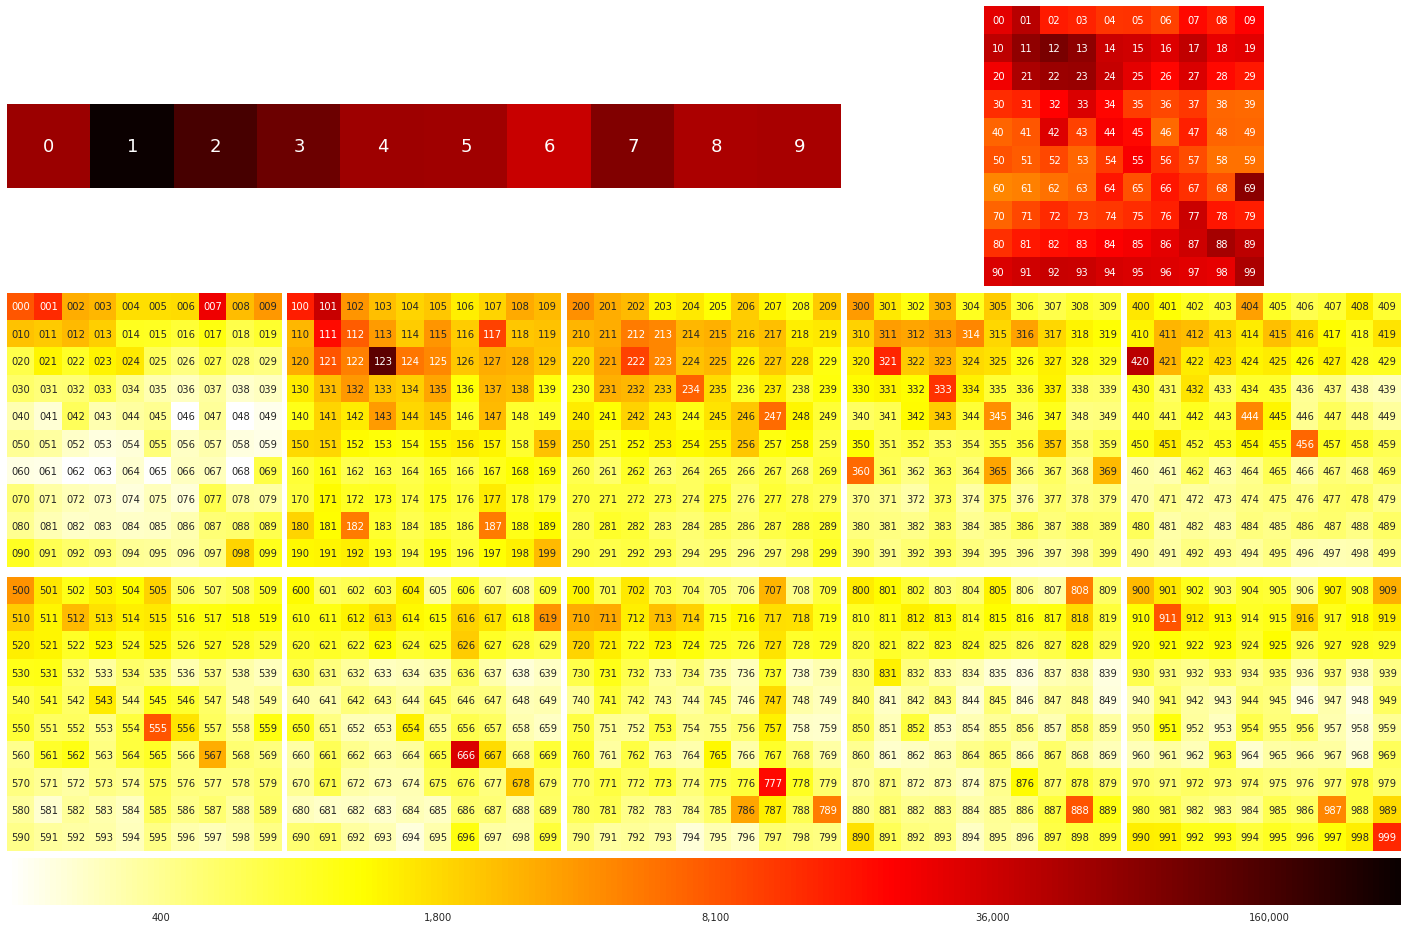

In [153]:
fig = heatmaps_square()

In [ ]:
assert False, "stuff below is a graveyard"

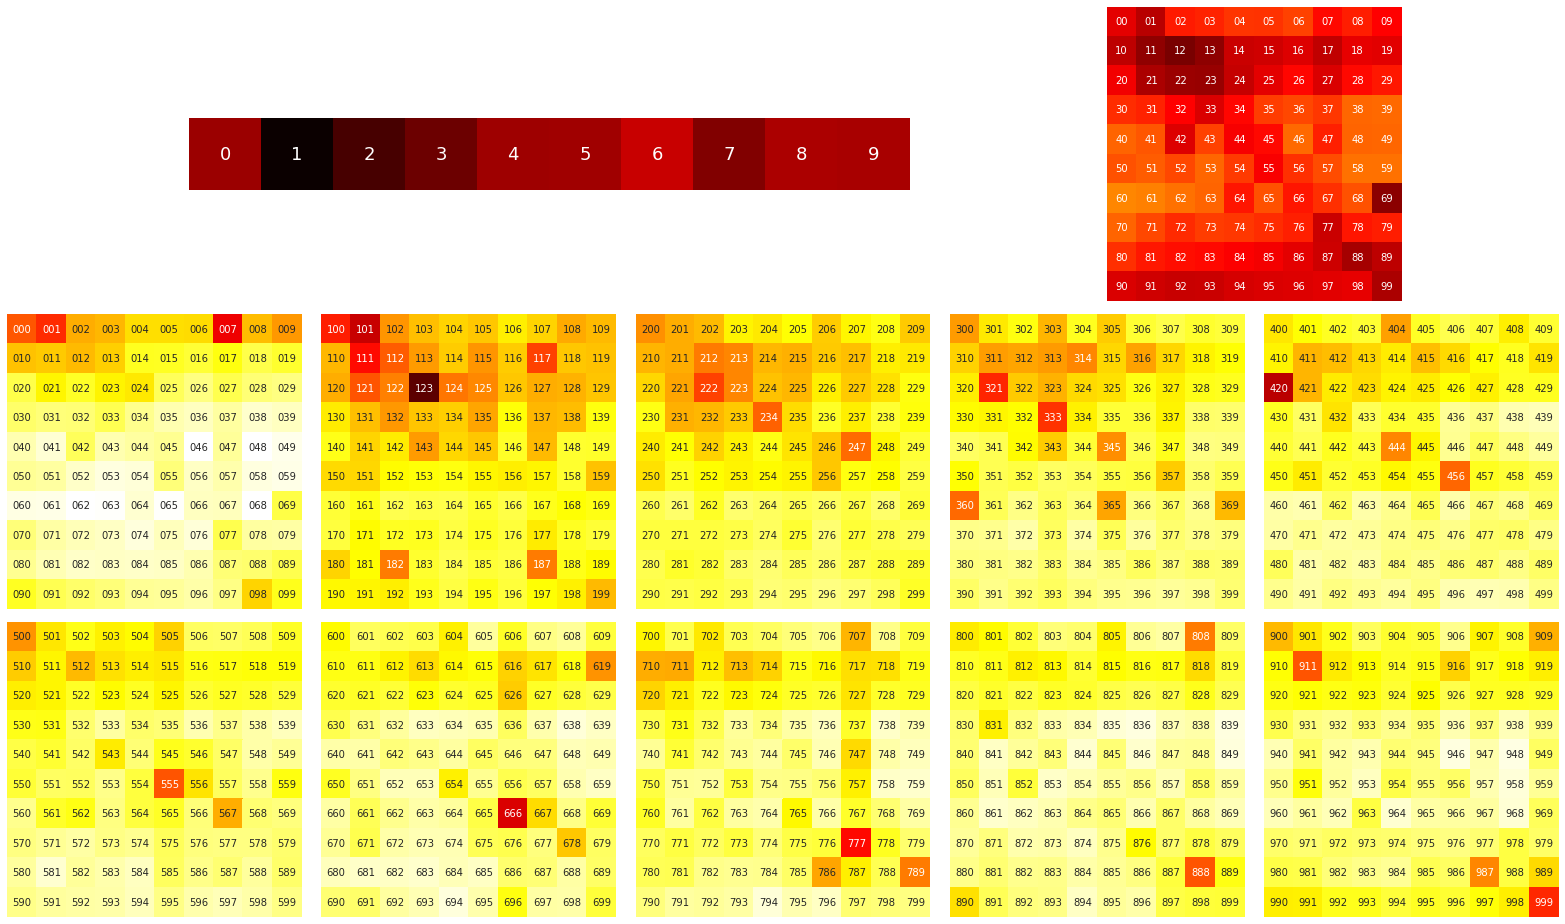

In [135]:
fig = heatmaps_square()

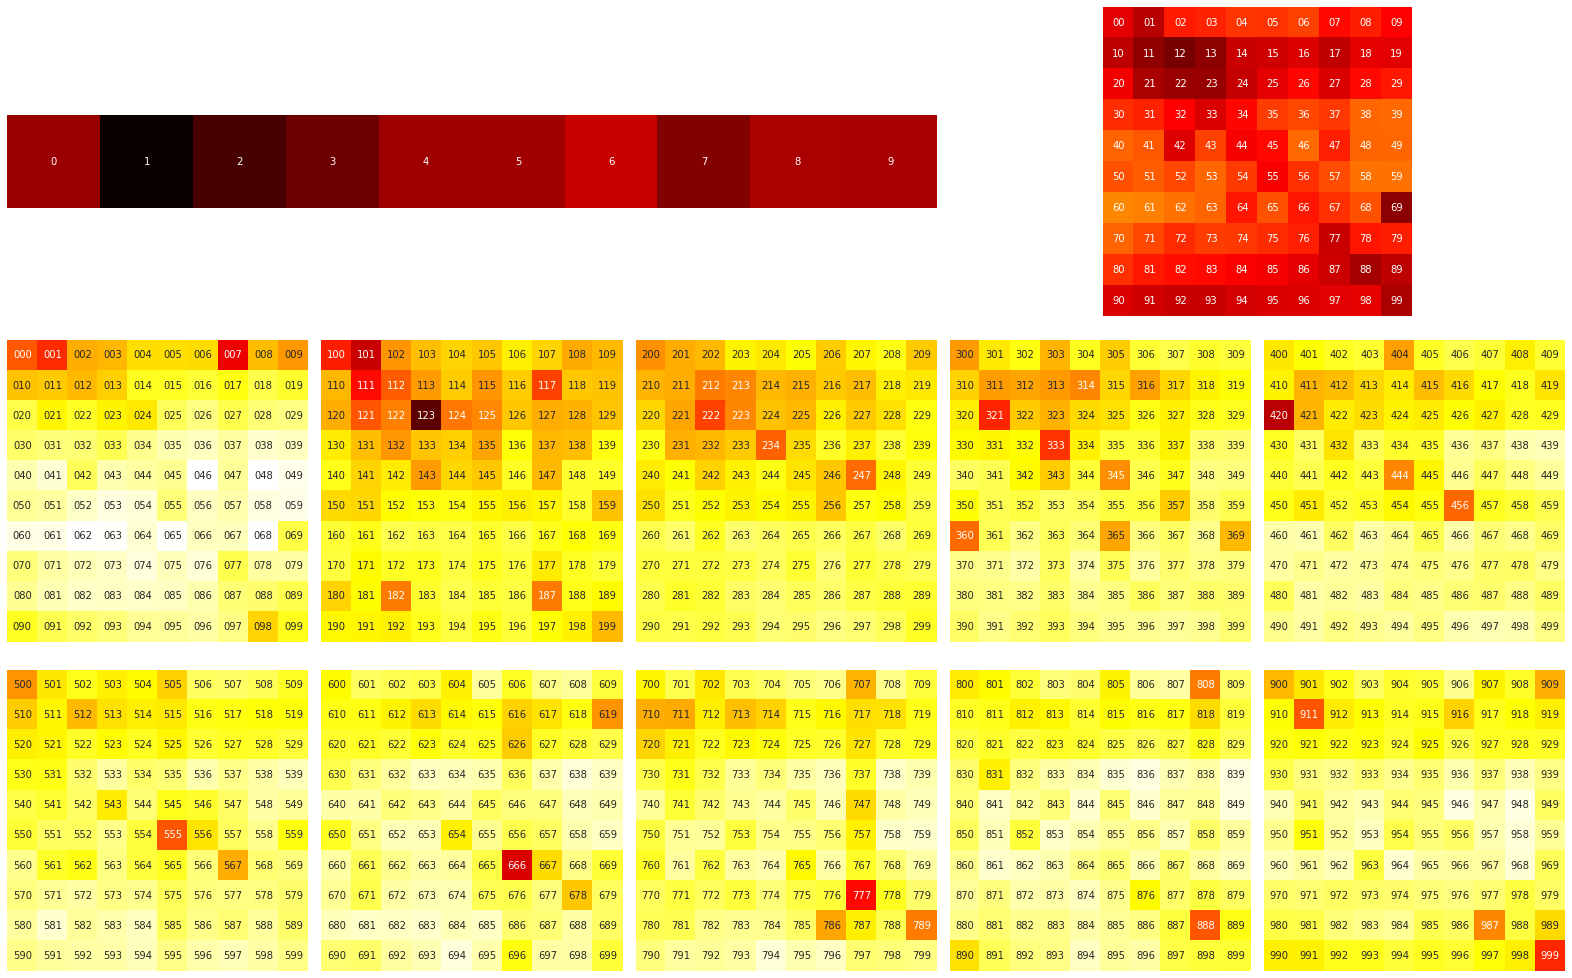

In [113]:
fig.set_figheight(14)
fig

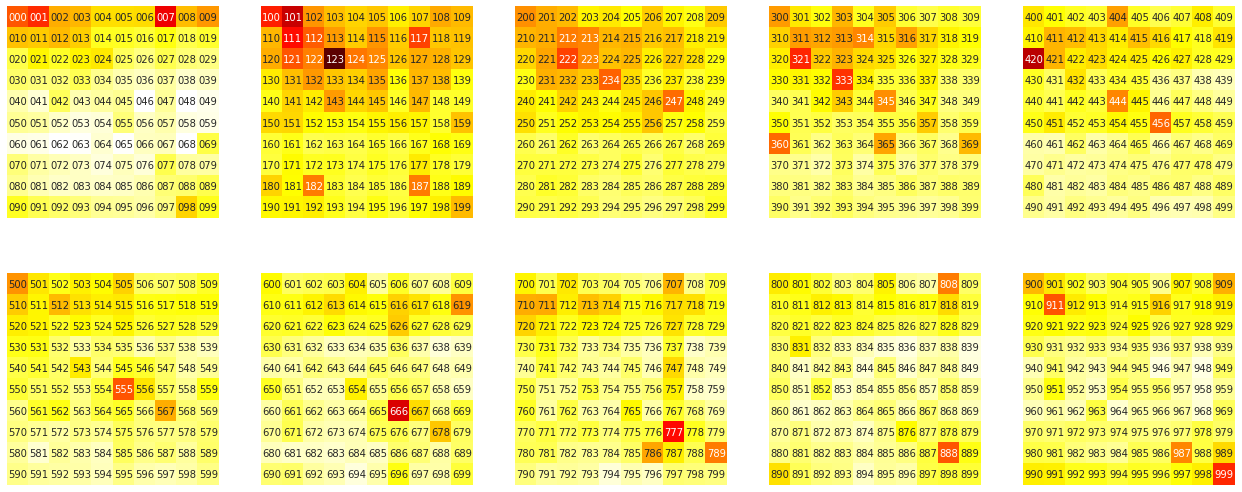

In [104]:
sharded_3d()

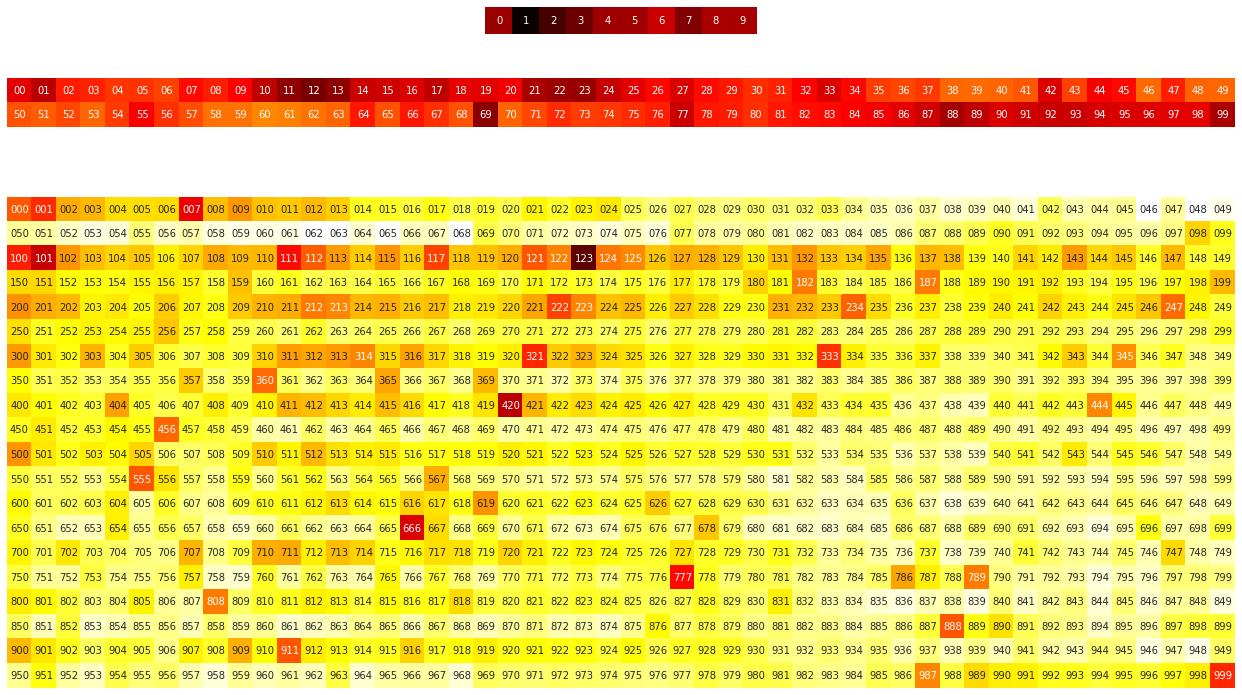

In [102]:
heatmaps()

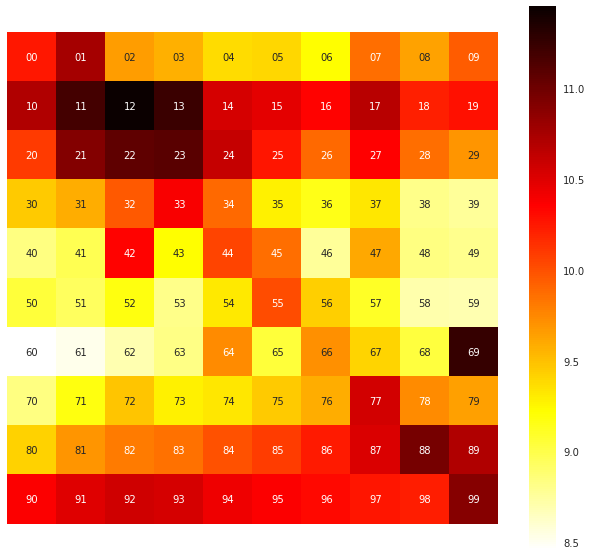

In [92]:
heatmap(2, 1);

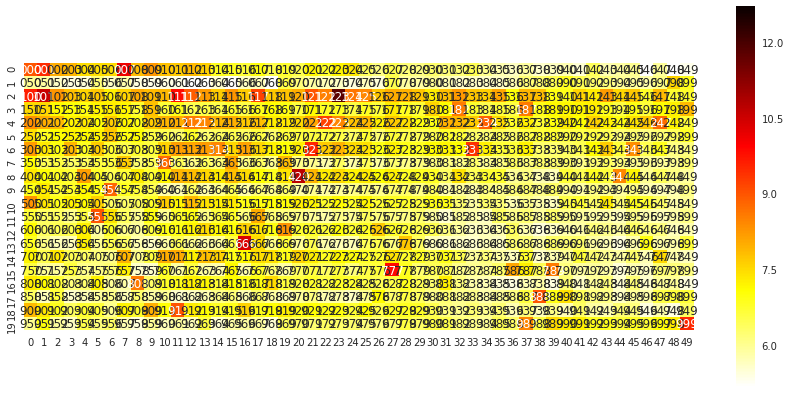

In [62]:
heatmap(3);

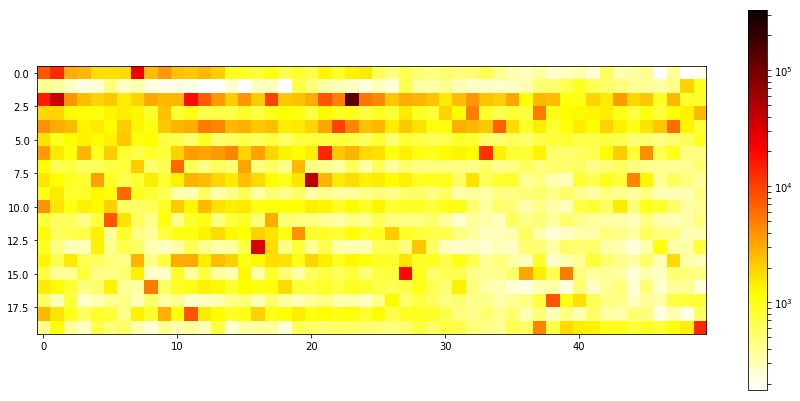

In [42]:
#from matplotlib import cm
import matplotlib.colors as mplc

n_max = df['n'].max()
smalls = df[df['len'] <= 3]
n_min = smalls['n'].min()

_norm_cls = mplc.LogNorm
norm_fn = _norm_cls(n_min, n_max)

cmap_name = 'hot_r'

def heatmap(n_digits):
    assert 1 <= n_digits <= 3
    n_to_shape = {1: (1, 10), 2: (10, 10), 3: (20, 50)}
    n_to_fs = {
        1: (11, 4),
        2: (11, 10),
        3: (15, 7)
    }
    shape = n_to_shape[n_digits]
    fs = n_to_fs[n_digits]
    fig, ax = plt.subplots(figsize=fs)
    
    sub = df[df['len']==n_digits].sort_values(by='val')
    dat = sub['n'].values.reshape(shape)
    heatmap = ax.imshow(dat, 
              cmap=cmap_name, 
              interpolation='nearest',
              aspect='equal',
              origin='upper',
              norm=norm_fn,
             )
    plt.colorbar(heatmap)
    return heatmap
    
img = heatmap(3);

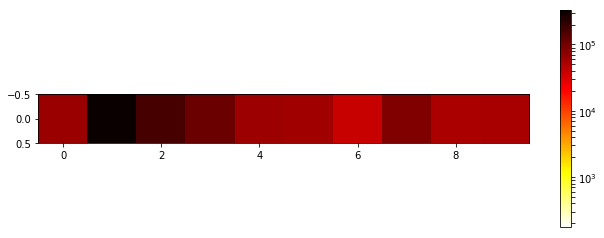

In [20]:
heatmap(1);

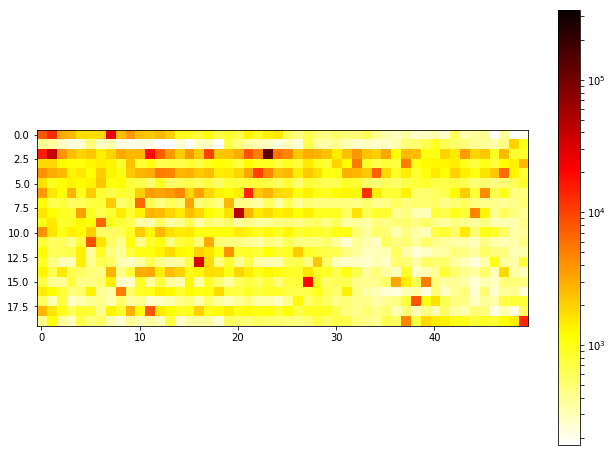

In [27]:
heatmap(3);

In [40]:
ks = [k for k in mpl.rcParams if k.startswith('image')]
{k: v for k, v in mpl.rcParams.items() if k in ks}

{u'image.aspect': u'equal',
 u'image.cmap': u'viridis',
 u'image.composite_image': True,
 u'image.interpolation': u'nearest',
 u'image.lut': 256,
 u'image.origin': u'upper',
 u'image.resample': True}